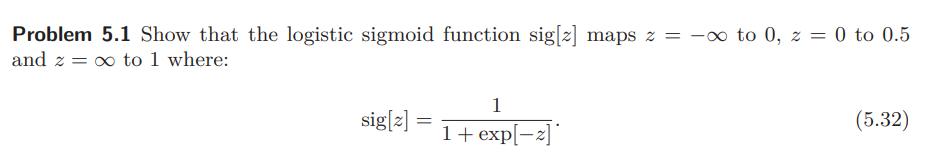

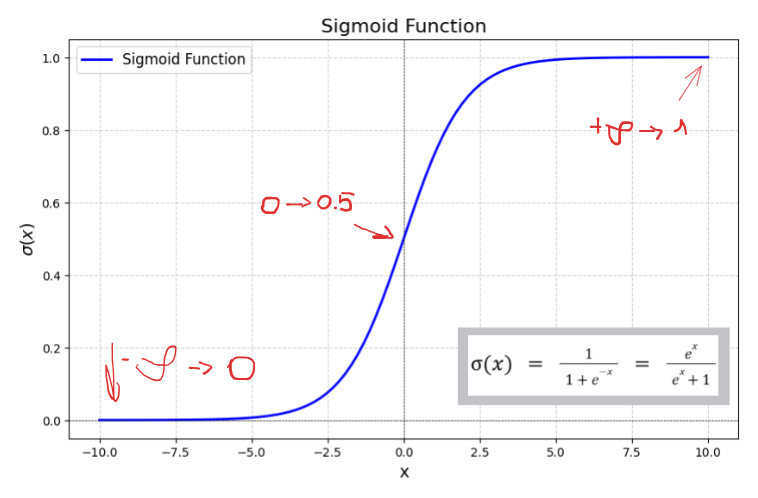

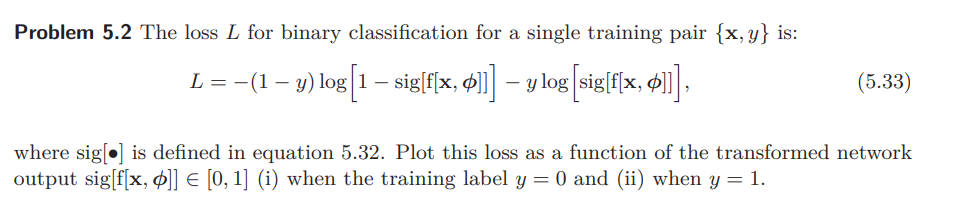

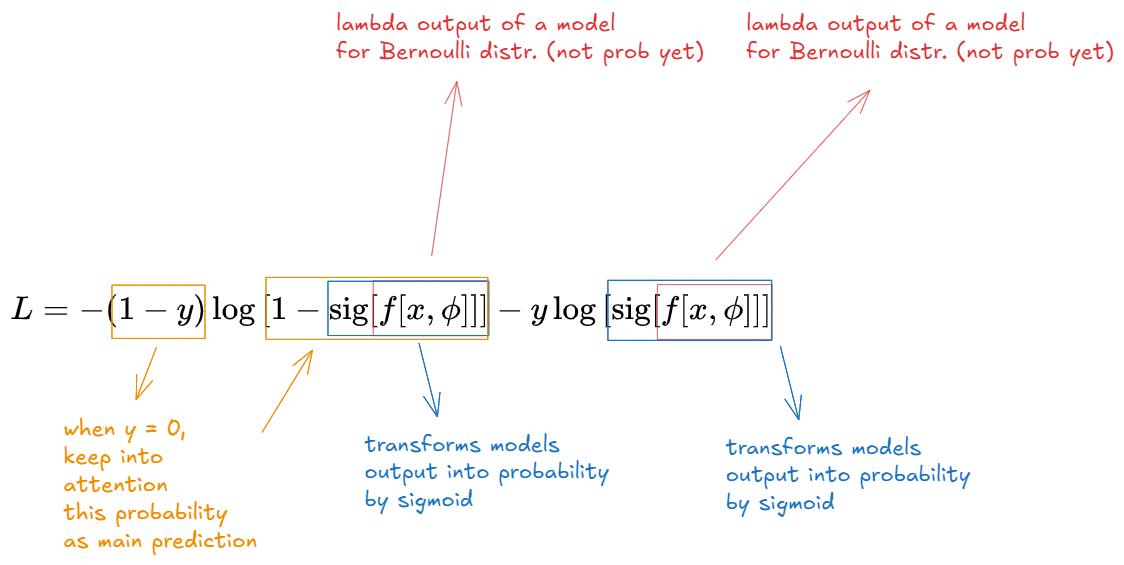

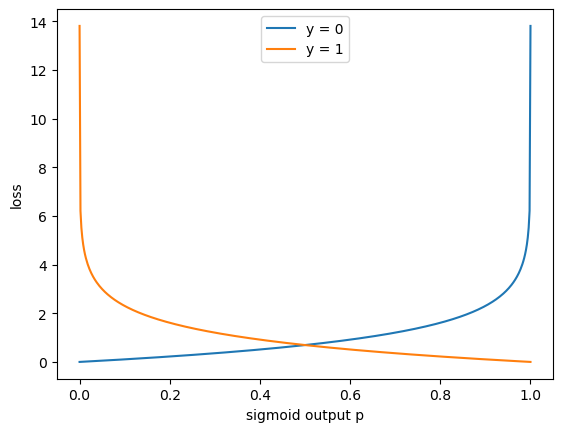

In [8]:
import numpy as np
import matplotlib.pyplot as plt

p = np.linspace(1e-6, 1-1e-6, 500)  # sigmoid outputs (probabilities)

L_y0 = -np.log(1 - p)
L_y1 = -np.log(p)

plt.plot(p, L_y0, label="y = 0")
plt.plot(p, L_y1, label="y = 1")
plt.xlabel("sigmoid output p")
plt.ylabel("loss")
plt.legend()
plt.show()

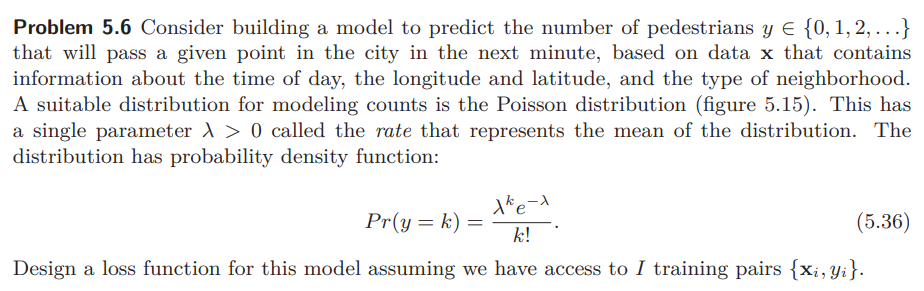

First of all - lets remind ourselves what is the recipe of building loss function:

1. Choose a suitable probability distribution $Pr(y|\theta)$ defined over the domain of the predictions $y$ with distribution parameters $\theta$.

2. Set the machine learning model $f[x, \phi]$ to predict one or more of these parameters, so $\theta = f[x, \phi]$ and $Pr(y|\theta) = Pr(y|f[x, \phi])$.
 
3. To train the model, find the network parameters $\hat{\phi}$ that minimize the negative log-likelihood loss function over the training dataset pairs $\{x_i, y_i\}$:
$$\hat{\phi} = \underset{\phi}{argmin} [L[\phi]] = \underset{\phi}{argmin} \left[ -\sum_{i=1}^I \log \mathrm{Pr}(y_i \mid f[x_i, \phi]) \right]$$

4. To perform inference for a new test example $x$, return either the full distribution $Pr(y|f[x, \hat{\phi}])$ or the maximum of this distribution.

1. So, as distribution for solving pedestrians problem we choose Poisson distribution:
$$Pr(y = k) = \frac{\lambda^k e^{-\lambda}}{k!}$$

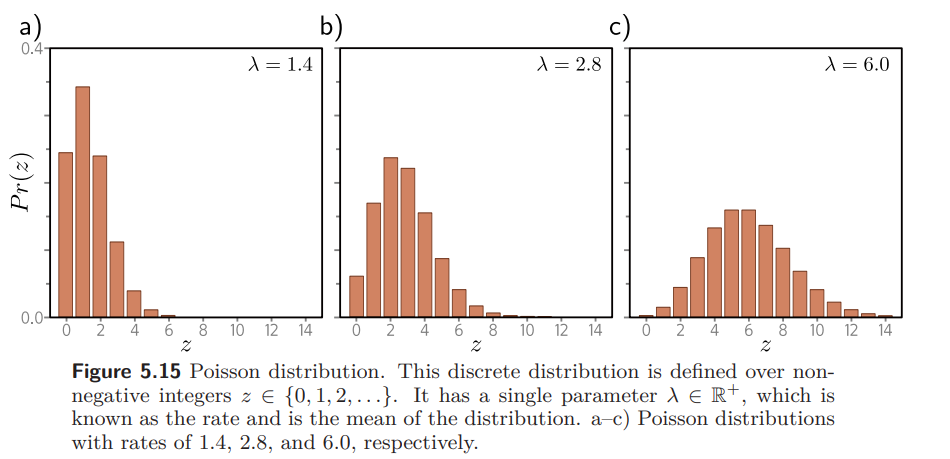

2. Here as a parameter we have - $\lambda$. It represents the mean of distribution so, our task, ot to be more precise - the task of the mahcine learning model is to find this parameter given training data:
$$\lambda = f[x, \phi]$$

So, now the model defines:
$$P(y | f[x, \phi], k) = \frac{f[x, \phi]^k e^{-f[x, \phi]}}{k!}$$

3. We need to define loss function and minimization of it

$$\hat{\phi} = \underset{\phi}{argmin} [L[\phi]] = \underset{\phi}{argmin} \left[ -\sum_{i=1}^I \log \mathrm{Pr}(y_i \mid f[x_i, \phi]) \right] =$$
$$= \underset{\phi}{argmin} [L[\phi]] = \underset{\phi}{argmin} \left[ -\sum_{i=1}^I \log \frac{f[x, \phi]^{y_i} e^{-f[x, \phi]}}{y_i!} \right]$$

$$L(\phi) \;=\; \sum_{i=1}^I \big(\lambda_i - y_i\log\lambda_i + \log(y_i!)\big).$$
$$\hat\phi = \arg\min_\phi \; \sum_{i=1}^I \big(\lambda_i - y_i\log\lambda_i\big), \qquad \text{where }\lambda_i=f(x_i,\phi)>0.$$

4. Now, after we minimized and have a full PDF for a certain x - we need to choose the maximum - $\lambda$:
$$\hat{y} = \arg\max_y P(y \mid \lambda).$$

---

Additional task on loss functions:

Example: predict waiting time to next bus (continuous positive variable)Task. Given input features $\mathbf{x}$ (time of day, stop location, day-of-week, weather), predict the waiting time $y \ge 0$ (minutes) until the next bus arrives.Chosen distribution. Exponential distribution with rate parameter $\lambda > 0$. Its PDF for $y \ge 0$ is$$p(y \mid \lambda) \;=\; \lambda e^{-\lambda y}, \qquad y\ge0.$$We let the model predict the rate:$$\lambda = f(\mathbf{x},\phi) > 0.$$

1. So, we choose exponential distribution as main theory distribution of y output:

$$p(y \mid \lambda) \;=\; \lambda e^{-\lambda y}, \qquad y\ge0.$$

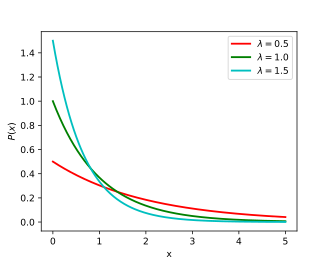

2. Here we have a sinle parameter - $\lambda$ that model will try to predict. And given it, we can get the PDF of y outout of waiting time:
$$\lambda = f[x, \phi]$$
$$p(y \mid f[x, \phi]) \;=\; f[x, \phi] e^{-f[x, \phi] y}$$

3. Lets define loss function using negative log likelihood loss:

$$\underset{\phi}{argmin} [L[\phi]]$$
, where:
$$\begin{aligned}
L[\phi] &= -\sum_{i=1}^{I} \log(\text{Pr}(y_i | f[x_i, \phi])) = \\
&= -\sum_{i=1}^{I} \log(\lambda_i e^{-\lambda_i y_i}) = \\
&= -\sum_{i=1}^{I} \left[ \log(\lambda_i) + \log(e^{-\lambda_i y_i}) \right] = \\
&= -\sum_{i=1}^{I} \left[ \log(\lambda_i) - \lambda_i y_i \right] = \\
&= -\sum_{i=1}^{I} \left[ \log(\hat{y}_i) - \hat{y}_i \cdot y_i \right]
\end{aligned}$$

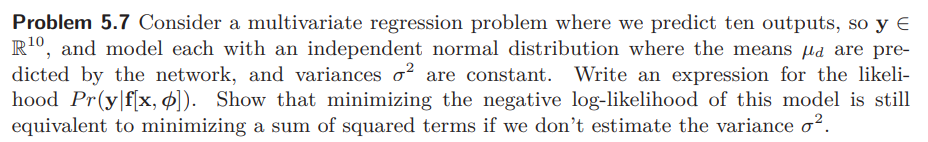

First of all, lets start with one output.

1. So we assume that y has Normal distribution. The PDF is:
$$P(y \mid \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left[-\frac{(y - \mu)^2}{2\sigma^2}\right].$$
, where $\sigma$(variance) is constant.

2. So, in order to get distrinution of outputs - we need to predict mean and this is the task for a model. So, models prediction is:
$$\mu = f[x, \phi]$$
$$P(y \mid f[x, \phi], \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left[-\frac{(y - f[x, \phi])^2}{2\sigma^2}\right].$$

3. Lets define los function using negative log likelihood:


1.We start with the Negative Log-Likelihood (NLL) for a Gaussian model:$$L[\phi] = -\sum_{i=1}^I \log\left[\frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(y_i - f[x_i, \phi])^2}{2\sigma^2}\right)\right]$$2. Separate the Logarithm: Using the log rule $\log(a \cdot b) = \log(a) + \log(b)$, we split the expression inside the sum:$$L[\phi] = -\sum_{i=1}^I \left[ \log\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right) + \log\left(\exp\left(-\frac{(y_i - f[x_i, \phi])^2}{2\sigma^2}\right)\right) \right]$$3. Simplify the Log-Exp Term: The logarithm and the exponential are inverse functions ($\log(\exp(x)) = x$), so they cancel each other out:$$L[\phi] = -\sum_{i=1}^I \left[ \log\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right) - \frac{(y_i - f[x_i, \phi])^2}{2\sigma^2} \right]$$4. Distribute the Negative Sign: We distribute the negative sign outside the brackets:$$L[\phi] = \sum_{i=1}^I \left[ -\log\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right) + \frac{(y_i - f[x_i, \phi])^2}{2\sigma^2} \right]$$5. Separate the Sum: Now we split the summation into two parts:$$L[\phi] = \sum_{i=1}^I \frac{(y_i - f[x_i, \phi])^2}{2\sigma^2} - \sum_{i=1}^I \log\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right)$$6. Identify the Constants: We are minimizing this loss with respect to the model parameters $\phi$, so after taking derivate - constants drop:
$$L_[\phi] = \sum_{i=1}^I (y_i - f[x_i, \phi])^2$$

Lets return to a multiple output problem

If we are talking about likelihood of a multiple output model - we just need to multiply all likelihoods:
$$P(\mathbf{y}|f[\mathbf{x}, \phi]) = \prod_{d} P(y_d | f_d[\mathbf{x}, \phi]) = $$
$$P(\mathbf{y}|f[\mathbf{x}, \phi]) = \prod_{d} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left[-\frac{(y_d - f_d[x, \phi])^2}{2\sigma^2}\right] = $$

If we are talking about loss function estimate of a multiple outputs model - is just adding losses for every prediction. aking the negative log of a product turns it into a sum:
$$L[\phi] = -\sum_i \log P(\mathbf{y}^{(i)}|f[\mathbf{x}_i, \phi]) = -\sum_i \sum_d \log P(y_{id} | f_d[\mathbf{x}_i, \phi]) = $$
$$= -\sum_i \sum_d \log \frac{1}{\sqrt{2\pi\sigma^2}} \exp -\frac{(y_d - f_d[x, \phi])^2}{2\sigma^2}$$